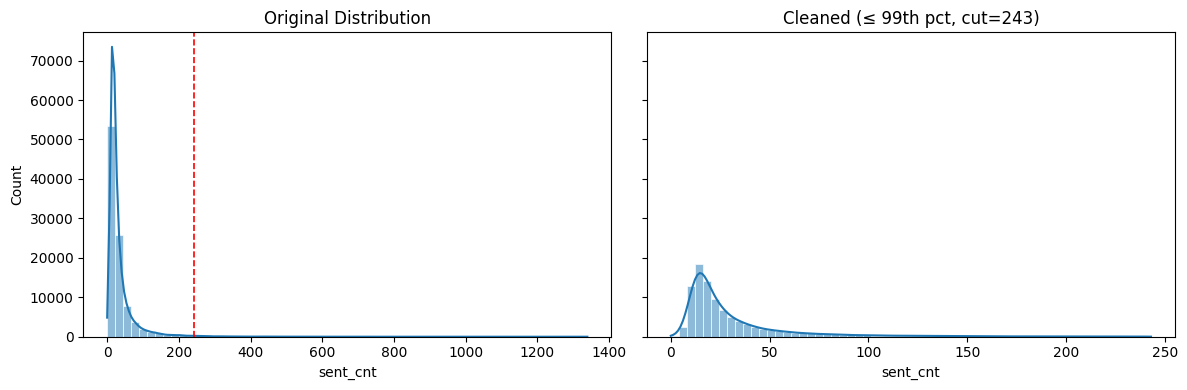

✔️  Saved cleaned data ➜ open/train_clean.csv
원본: 97,172 rows → 정제 후: 96,207 rows (컷오프 = 243 문장)


,title,full_text,generated
0,카호올라웨섬,카호올라웨섬은 하와이 제도를 구성하는 8개의 화산섬 가운데 하나로 면적은 115.5...,0
1,청색거성,"천문학에서 청색거성(靑色巨星, )은 광도 분류에서 III형(거성) 또는 II형(밝은...",0
2,엘자스-로트링겐 평의회 공화국,엘자스-로트링겐 평의회 공화국은 1차대전 말기 독일 혁명 와중에 엘자스-로트링겐에서...,0
3,윌리엄 페니 브룩스,"윌리엄 페니 브룩스(, 1809년 8월 13일 ~ 1895년 12월 11일)는 잉글...",0
4,미그로,"미그로 또는 미그로스(""Migros"")는 스위스 최대 소매 회사이자, 최대 슈퍼마켓...",0
...,...,...,...
96202,페르디난드 마젤란,"페르디난드 마젤란(, , , 1480년 봄 ~ 1521년 4월 27일)은 포르투갈 ...",0
96203,김용국 (만주보민회),"김용국(金用國, ? ~ ?)은 일제강점기에 만주보민회에서 활동했던 인물이다. \n ...",0
96204,알라 알사시,"알라 알사시(, 1987년 7월 2일 ~ )은 예멘의 축구 선수로 포지션은 공격형 ...",0
96205,전한 고제,패현(沛縣)의 정장(亭長)으로 있다가 진나라에 맞서는 봉기에 가담하고서 진의 수도 ...,0


In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Optional

# --------------- 문장 수 카운트 함수 ---------------
def count_sentences(text: str) -> int:
    # 온점·물음표·느낌표 뒤에 공백(또는 줄바꿈)이 오면 문장 경계로 간주
    return len(re.findall(r'[.!?](?:\s|$)', str(text).strip()))

# --------------- 메인 함수 -------------------------
def clean_and_plot(csv_path: str,
                   p: float = 0.99,
                   text_col: str = 'full_text',
                   save_path: Optional[str] = None,
                   figsize: tuple = (12, 4),
                   show_original: bool = True) -> pd.DataFrame:
    
    # 1) 데이터 로드 & 문장 수 계산
    df = pd.read_csv(csv_path, encoding='utf-8-sig')
    df['sent_cnt'] = df[text_col].apply(count_sentences)
    
    # 2) 컷오프 임계값
    cut_val = df['sent_cnt'].quantile(p)
    
    # 3) 극단치 제거
    df_clean = df[df['sent_cnt'] <= cut_val].reset_index(drop=True)
    
    # 4) 시각화 --------------------------------------------------------
    if show_original:
        fig, axes = plt.subplots(1, 2, figsize=figsize, sharey=True)
        ax1, ax2 = axes
    else:
        fig, ax2 = plt.subplots(figsize=figsize)
    
    # 4-1) 원본 분포
    if show_original:
        sns.histplot(df['sent_cnt'], bins=60, kde=True, edgecolor='w', ax=ax1)
        ax1.axvline(cut_val, color='red', linestyle='--', linewidth=1.2)
        ax1.set_title('Original Distribution')
        ax1.set_xlabel('sent_cnt')
        ax1.set_ylabel('Count')
    
    # 4-2) 정제 후 분포
    sns.histplot(df_clean['sent_cnt'], bins=60, kde=True, edgecolor='w', ax=ax2)
    ax2.set_title(f'Cleaned (≤ {p*100:.0f}th pct, cut={int(cut_val)})')
    ax2.set_xlabel('sent_cnt')
    ax2.set_ylabel('Count')
    
    plt.tight_layout()
    plt.show()
    # ----------------------------------------------------------------
    
    # 5) 파일 저장
    df_clean_final = df_clean.drop(columns=['sent_cnt'])
    if save_path:
        df_clean_final.to_csv(save_path, index=False, encoding='utf-8-sig')
        print(f'✔️  Saved cleaned data ➜ {save_path}')
    
    # 6) 요약 출력
    print(f'원본: {len(df):,} rows → 정제 후: {len(df_clean_final):,} rows '
          f'(컷오프 = {cut_val:.0f} 문장)')
    
    return df_clean_final

# ------------------ 사용 예시 ----------------------
clean_and_plot('data/raw/train.csv',
               p=0.99,
               text_col='full_text',
               save_path='data/raw/train_clean.csv',
               show_original=True)

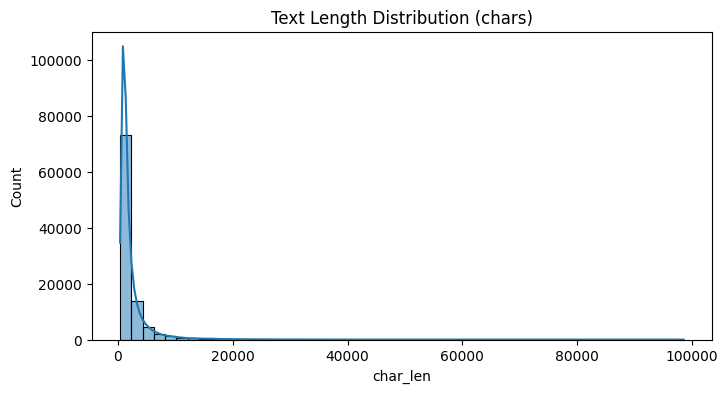

📏 최장 본문 길이: 98,549자
title        불법행위 판례 목록
generated             0
Name: 47417, dtype: object
98,549자는 하위 100.00000000 percentile (즉 상위 0.00000000 %) 위치입니다.


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

train['char_len'] = train['full_text'].str.len()
plt.figure(figsize=(8,4))
sns.histplot(train['char_len'], bins=50, kde=True)
plt.title('Text Length Distribution (chars)')
plt.show()
max_len = train['char_len'].max()      # 또는 char_len 시리즈를 새 변수에 할당
print(f"📏 최장 본문 길이: {max_len:,}자")

# (선택) 최장 샘플의 인덱스와 정보 확인
idx_longest = train['char_len'].idxmax()
print(train.loc[idx_longest, ['title', 'generated']])   # 필요 컬럼만 표시표시
value = 98_549  # 확인할 길이(문자 수)

pct_lower = (train['char_len'] <= value).mean() * 100   # 하위 퍼센타일(%)
pct_upper = 100 - pct_lower                             # 상위 퍼센타일(%)

# 소수점 8자리까지 표시
print(f"{value:,}자는 하위 {pct_lower:.8f} percentile "
      f"(즉 상위 {pct_upper:.8f} %) 위치입니다.")

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Optional      # ⬅️ 추가

def remove_long_text(csv_path: str,
                     char_threshold: int = 50_000,      # 9만자 컷
                     text_col: str = 'full_text',
                     save_path: Optional[str] = None,   # ⬅️ 수정
                     figsize: tuple = (12, 4),
                     show_original: bool = True):

    # 0) 데이터 로드 & 길이 계산
    df = pd.read_csv(csv_path, encoding='utf-8-sig')
    df['char_len'] = df[text_col].str.len()

    # 1) 필터링
    df_clean = df[df['char_len'] <= char_threshold].reset_index(drop=True)

    # 2) 시각화 ───────────────────────────────────────────────
    if show_original:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize, sharey=True)
        sns.histplot(df['char_len'], bins=60, kde=True, edgecolor='w', ax=ax1)
        ax1.axvline(char_threshold, color='red', ls='--', lw=1.2)
        ax1.set_title('Original char_len')
        ax1.set_xlabel('chars'); ax1.set_ylabel('Count')

        sns.histplot(df_clean['char_len'], bins=60, kde=True, edgecolor='w', ax=ax2)
        ax2.set_title(f'Cleaned (≤ {char_threshold:,} chars)')
        ax2.set_xlabel('chars'); ax2.set_ylabel('Count')
    else:
        plt.figure(figsize=figsize)
        sns.histplot(df_clean['char_len'], bins=60, kde=True, edgecolor='w')
        plt.axvline(char_threshold, color='red', ls='--', lw=1.2)
        plt.title(f'Cleaned char_len (≤ {char_threshold:,})')
        plt.xlabel('chars'); plt.ylabel('Count')

    plt.tight_layout()
    plt.show()
    # ──────────────────────────────────────────────────────

    # 3) 저장
    if save_path:
        df_clean.drop(columns=['char_len']).to_csv(save_path,
                                                   index=False,
                                                   encoding='utf-8-sig')
        print(f"✔️  Saved cleaned data ➜ {save_path}")

    # 4) 요약
    print(f"원본: {len(df):,} rows → 정제 후: {len(df_clean):,} rows "
          f"(길이 ≤ {char_threshold:,}자)")
    print(f"   ‣ 최장 길이(정제前): {df['char_len'].max():,}자")
    print(f"   ‣ 최장 길이(정제後): {df_clean['char_len'].max():,}자")
     # 🔻 generated 값별 최장 길이 추가
    max_by_gen = df_clean.groupby('generated')['char_len'].max()
    for label in max_by_gen.index:                     # label = 0, 1
        print(f"   ‣ generated={label} 최장 길이: {max_by_gen[label]:,}자")

    
    return df_clean


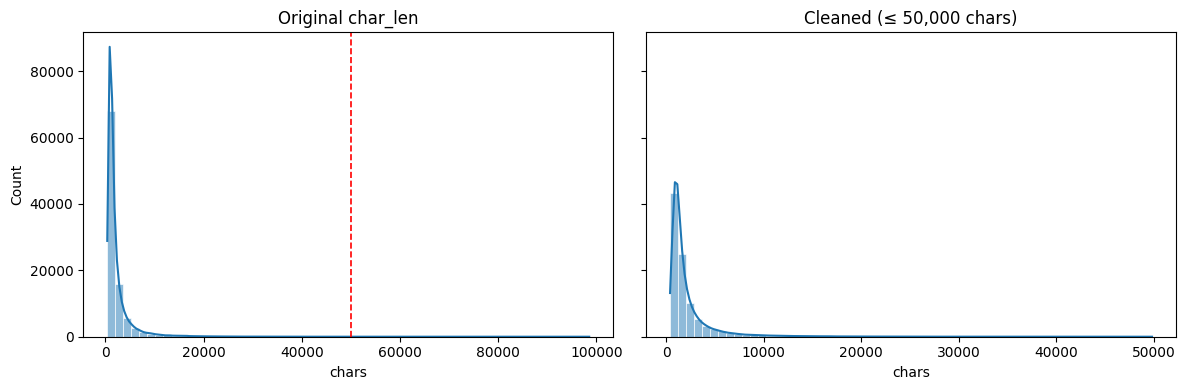

✔️  Saved cleaned data ➜ open/train_clean_char.csv
원본: 97,172 rows → 정제 후: 97,128 rows (길이 ≤ 50,000자)
   ‣ 최장 길이(정제前): 98,549자
   ‣ 최장 길이(정제後): 49,842자
   ‣ generated=0 최장 길이: 49,842자
   ‣ generated=1 최장 길이: 46,814자


In [ ]:
clean_df = remove_long_text(
    csv_path='open/train.csv',
    char_threshold=50_000,         # 9만자 초과 삭제
    text_col='full_text',
    save_path='open/train_clean_char.csv',
    show_original=True
)

In [32]:
import os
import pandas as pd

def count_rows_by_label(csv_path: str,
                        label_col: str = 'generated',
                        encoding: str = 'utf-8-sig') -> None:
    """
    csv_path  : CSV 파일 경로
    label_col : 라벨 컬럼명 (기본 'generated')
    encoding  : 파일 인코딩
    """
    if not os.path.isfile(csv_path):
        print(f"❗️ 파일을 찾을 수 없습니다 → {csv_path}")
        return

    df = pd.read_csv(csv_path, encoding=encoding)

    # 전체 행 수
    total = len(df)
    print(f"\n📊 전체 행 수: {total:,}개")

    # 라벨별 행 수
    counts = df[label_col].value_counts().sort_index()

    print("\n🗂 라벨별 행 수")
    for label, cnt in counts.items():
        print(f" • {label_col} = {label}: {cnt:,}개")

    # (선택) 비율까지 보고 싶다면:
    pct = (counts / total * 100).round(2)
    print("\n📈 라벨별 비율(%)")
    for label, p in pct.items():
        print(f" • {label_col} = {label}: {p:.2f}%")

# 사용 예시
count_rows_by_label('open/train_clean_char.csv')
count_rows_by_label('open/train.csv')


📊 전체 행 수: 97,128개

🗂 라벨별 행 수
 • generated = 0: 89,133개
 • generated = 1: 7,995개

📈 라벨별 비율(%)
 • generated = 0: 91.77%
 • generated = 1: 8.23%

📊 전체 행 수: 97,172개

🗂 라벨별 행 수
 • generated = 0: 89,177개
 • generated = 1: 7,995개

📈 라벨별 비율(%)
 • generated = 0: 91.77%
 • generated = 1: 8.23%
